<a href="https://www.kaggle.com/code/srijitsengupta06/breast-cancer-wisconsin-analysis-ipynb?scriptVersionId=241552567" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
file_path = '/kaggle/input/breast-cancer-wisconsin-data/data.csv'
df = pd.read_csv(file_path)

# Step 3: Previewing the data.
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Drop the 'id' column as it’s not useful for prediction
df.drop(columns=['id'], inplace=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Convert diagnosis column to binary (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Set the target and features
y = df['diagnosis']
X = df.drop(columns=['diagnosis'])

# Display shape and types
print("\nData shape:", X.shape)
print("Feature types:\n", X.dtypes)


Missing values:
 diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32           

In [4]:
# Drop the completely empty column
X.drop(columns=['Unnamed: 32'], inplace=True)

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

# Drop the 'id' and 'Unnamed: 32' columns if present
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

# Encode target variable: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Step 4: Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
 [[70  1]
 [ 2 41]]


# Train and Evaluate a Random Forest Classifier 


In this step, we train a Random Forest model to classify tumors as malignant or benign using the features from our dataset.

Random Forest is an ensemble method that builds multiple decision trees and averages their results to improve accuracy and reduce overfitting. We use 100 trees *(n_estimators=100)* and set a random seed *(random_state=42)* for reproducibility.

The model is trained on the scaled training data to ensure all features contribute evenly. After training, we predict on the scaled test set to evaluate how well the model generalizes to new data.

To assess performance, we calculate accuracy, which shows the overall percentage of correct predictions. We also print a classification report to see precision, recall, and F1-score for each class, which help us understand how well the model handles false positives and false negatives. Lastly, the confusion matrix provides a clear summary of prediction errors.

This evaluation tells us if the Random Forest can reliably distinguish between malignant and benign tumors based on the input features.

In [7]:
# Step 5: Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
 [[70  1]
 [ 3 40]]


 # **Visualizing the Confusion Matrix with a Heatmap**
Here, we visualize the confusion matrix for the Random Forest model’s predictions on the test data.

The confusion matrix summarizes the number of correct and incorrect predictions, broken down by each class — in this case, benign and malignant tumors. It helps us see not just overall accuracy, but the types of errors the model makes, such as false positives (predicting malignant when it’s benign) or false negatives (predicting benign when it’s malignant).

We use Seaborn’s heatmap to plot the confusion matrix, with annotated values for easy interpretation. The colors help highlight where the model performs well and where it might be making mistakes.

This visual aid provides a quick and intuitive way to understand the model’s strengths and weaknesses in classifying tumor types.



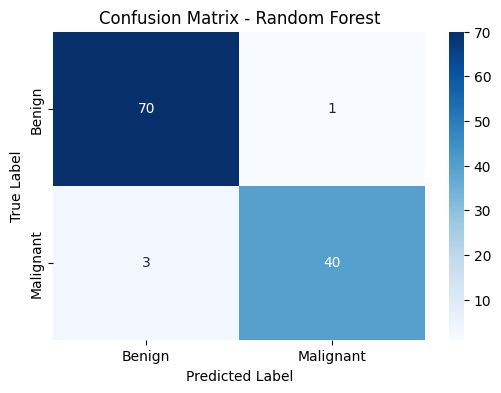

In [8]:
# Step 6: Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


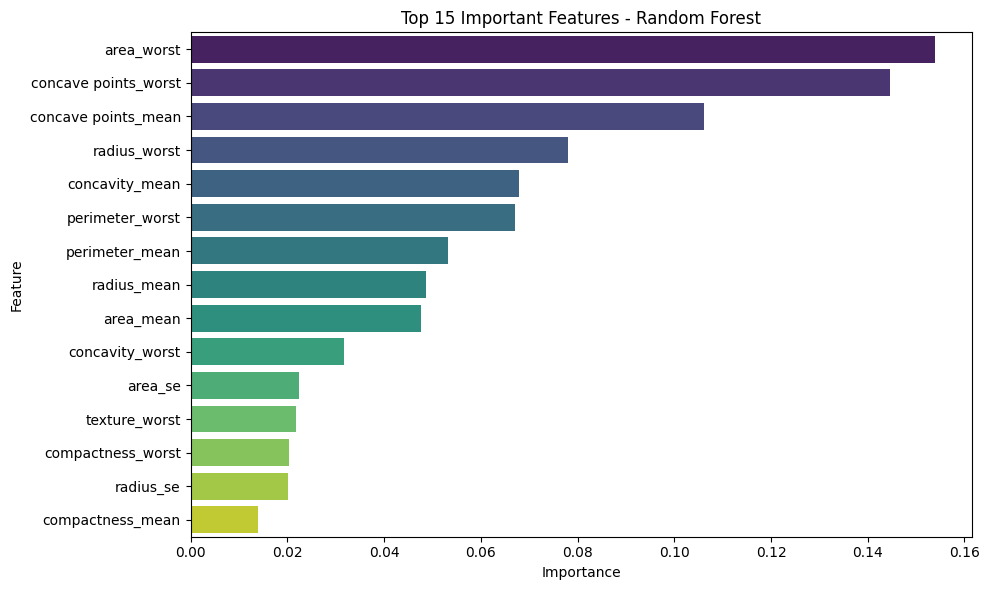

In [9]:
# Step 7: Feature Importance from Random Forest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances and match to column names
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Important Features - Random Forest')
plt.tight_layout()
plt.show()


# **ROC Curve and AUC**
In this step, we evaluate the Random Forest model’s ability to distinguish between benign and malignant tumors using the ROC curve. The ROC curve plots the True Positive Rate against the False Positive Rate at various threshold settings, showing the trade-off between sensitivity and specificity.

The Area Under the Curve (AUC) summarizes the overall performance — a higher AUC indicates better model discrimination. Plotting this curve helps us visually assess how well the model separates the two classes beyond simple accuracy metrics.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


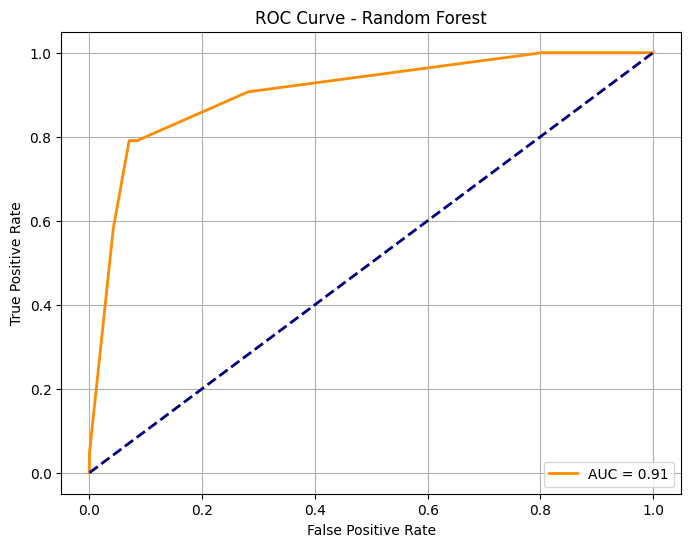

In [10]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **Cross-Validation for Model Generalization**
To better evaluate the robustness of our Random Forest model, we perform 5-fold cross-validation on the entire dataset. This method splits the data into five subsets (folds), sequentially training the model on four folds and validating it on the remaining fold. This process repeats five times, ensuring every data point is used for both training and testing.

Before cross-validation, we apply StandardScaler to scale the entire feature matrix X. This standardization ensures that features have zero mean and unit variance, which helps the model converge and perform consistently across folds.

Using cross_val_score, we train and validate the RandomForestClassifier with 100 trees and a fixed random state to maintain reproducibility. The scoring metric is accuracy, which quantifies the proportion of correctly classified samples in each fold.

The output provides accuracy scores for each fold, along with the mean accuracy and its standard deviation. A high mean accuracy with a low standard deviation indicates that the model generalizes well and performs reliably across different subsets of data.

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize the Random Forest Classifier (same parameters as before)
rf_model_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation on the entire dataset (X and y, scaled)
# Since you already scaled X_train and X_test separately, let's scale X fully first:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale entire X before CV

# Run cross-validation, scoring by accuracy
cv_scores = cross_val_score(rf_model_cv, X_scaled, y, cv=5, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean cross-validation accuracy: {np.mean(cv_scores):.4f}')
print(f'Standard deviation of CV accuracy: {np.std(cv_scores):.4f}')


Cross-validation scores for each fold: [0.92105263 0.93859649 0.98245614 0.96491228 0.96460177]
Mean cross-validation accuracy: 0.9543
Standard deviation of CV accuracy: 0.0217


# **Final Results**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


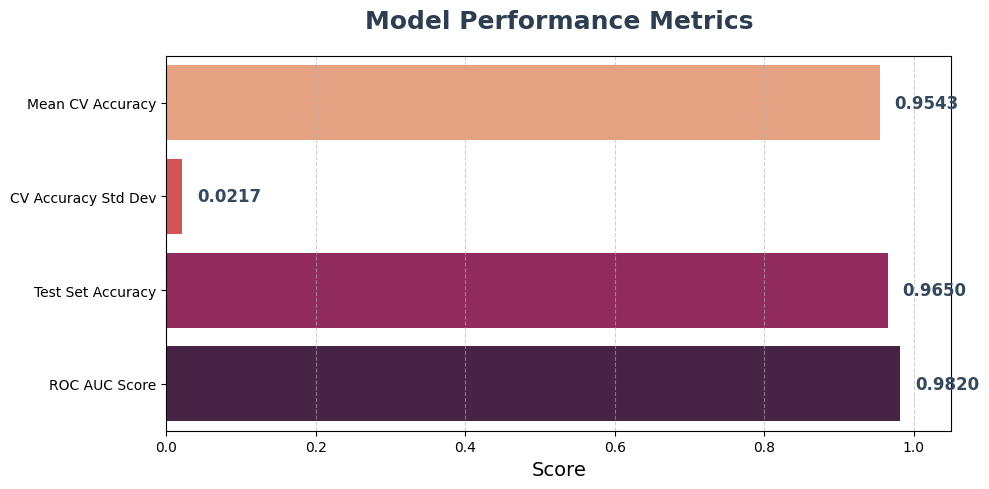

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = {
    'Mean CV Accuracy': 0.9543,
    'CV Accuracy Std Dev': 0.0217,
    'Test Set Accuracy': 0.965,
    'ROC AUC Score': 0.982
}

plt.figure(figsize=(10, 5))
colors = sns.color_palette("rocket_r", len(metrics))  # Bold, gradient palette

bars = sns.barplot(x=list(metrics.values()), y=list(metrics.keys()), palette=colors)

plt.xlim(0, 1.05)
plt.xlabel('Score', fontsize=14)
plt.title('Model Performance Metrics', fontsize=18, weight='bold', color='#2c3e50', pad=20)

# Add value labels on each bar, aligned to the right of the bar end
for bar in bars.patches:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(width + 0.02, y_pos, f'{width:.4f}', 
             va='center', ha='left', fontsize=12, weight='bold', color='#34495e')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
